In [1]:
#! conda install jupyter_bokeh

In [1]:
import os
import keypoint_moseq as kpms


c:\Users\Steve\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\analysis.py:20: UserWarning:

Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.



In [2]:
project_dir = 'C:/Users/Steve/Desktop/Karin/katiesvideosmodeling/keypointmoseqwork/'
video_dir = 'C:/Users/Steve/Desktop/Karin/katiesvideosmodeling/keypointmoseqwork/videos/'
data_dir = 'C:/Users/Steve/Desktop/Karin/katiesvideosmodeling/keypointmoseqwork/'
config = lambda: kpms.load_config(project_dir)

In [3]:
bodyparts=[
'nose',
'earL',
'earR',
'head',
'centroid',
'tailBase',
'tailEnd',
'upperBack',
'lowerBack',
'lateralL',
'lateralR',]

skeleton=[
    ['nose', 'earL'],
    ['nose', 'earR'],
    ['nose', 'head'],
    ['nose', 'lateralL'],
    ['nose', 'lateralR'],
    ['head', 'upperBack'],
    ['upperBack', 'lowerBack'],
    ['lowerBack', 'tailBase'],
    ['tailBase', 'tailEnd']
    ]


In [4]:
video_dir = os.path.join(data_dir, 'videos')
kpms.setup_project(
    project_dir,
    video_dir=video_dir,
    bodyparts=bodyparts,
    skeleton=skeleton,
    overwrite=True)

In [5]:
kpms.update_config(
    project_dir,
    video_dir=os.path.join(data_dir, 'videos'),
    anterior_bodyparts=['nose'],
    posterior_bodyparts=['tailBase'],
    use_bodyparts=[
   'nose','earL', 'earR','head','centroid','tailBase','upperBack','lowerBack','lateralL','lateralR'])

In [6]:
# load data (e.g. from DeepLabCut)
keypoint_data_path = os.path.join(data_dir, 'videos') # can be a file, a directory, or a list of files
coordinates, confidences, bodyparts = kpms.load_keypoints(keypoint_data_path, 'sleap')

# format data for modeling
data, metadata = kpms.format_data(coordinates, confidences, **config())

Loading keypoints: 100%|███████████████| 13/13 [00:00<00:00, 126.25it/s]
c:\Users\Steve\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\util.py:836: UserWarning:


Coordinates for the following bodyparts are missing (set to NaN) in at least 50.0% of frames:
 - tailEnd



c:\Users\Steve\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\util.py:842: UserWarning:

This may cause problems during modeling. See https://keypoint-moseq.readthedocs.io/en/latest/FAQs.html#high-proportion-of-nans for additional information.



>=90.0% of variance exlained by 9 components.


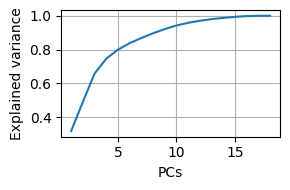

AttributeError: module 'matplotlib.cm' has no attribute 'get_cmap'

In [7]:
pca = kpms.fit_pca(**data, **config())
kpms.save_pca(pca, project_dir)

kpms.print_dims_to_explain_variance(pca, 0.9)
kpms.plot_scree(pca, project_dir=project_dir)
kpms.plot_pcs(pca, project_dir=project_dir, **config())

# use the following to load an already fit model
# pca = kpms.load_pca(project_dir)

In [ ]:
kpms.update_config(project_dir, latent_dim=9)

In [8]:
# initialize the model
model = kpms.init_model(data, pca=pca, **config())

# optionally modify kappa
# model = kpms.update_hypparams(model, kappa=NUMBER)

Outputs will be saved to C:/Users/Steve/Desktop/Karin/katiesvideosmode
ling/keypointmoseqwork/2024_07_02-14_47_40


 49%|█████████████████▏                 | 25/51 [05:21<05:39, 13.04s/it]

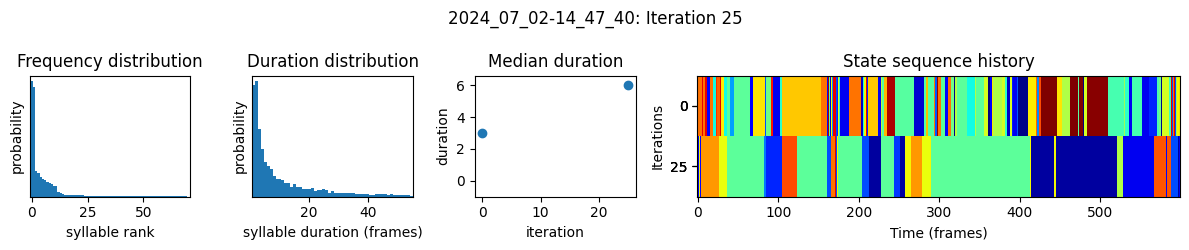

 98%|██████████████████████████████████▎| 50/51 [10:55<00:13, 13.34s/it]

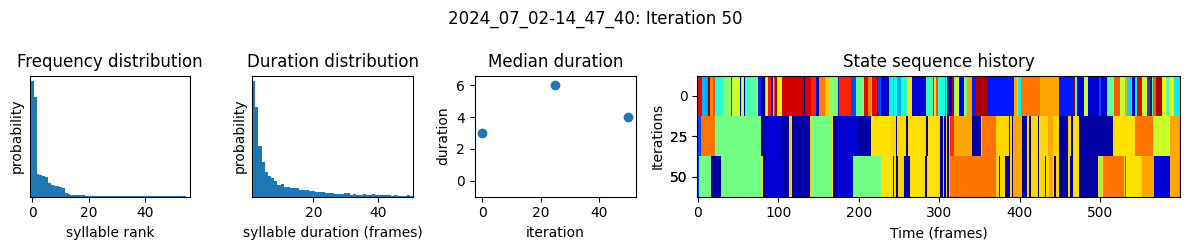

100%|███████████████████████████████████| 51/51 [11:09<00:00, 13.13s/it]


In [15]:
num_ar_iters = 50

model, model_name = kpms.fit_model(
    model, data, metadata, project_dir,
    ar_only=True, num_iters=num_ar_iters)

In [9]:
model_name= '2024_07_02-15_13_54'
num_ar_iters = 50
# load model checkpoint
model, data, metadata, current_iter = kpms.load_checkpoint(
    project_dir, model_name, iteration=num_ar_iters)

In [10]:
# modify kappa to maintain the desired syllable time-scale
model = kpms.update_hypparams(model, kappa=1e4)

: 

In [11]:
# run fitting for an additional 500 iters
model = kpms.fit_model(
    model, data, metadata, project_dir, model_name, ar_only=False, 
    start_iter=current_iter, num_iters=current_iter+1)[0]

Outputs will be saved to C:/Users/Steve/Desktop/Karin/katiesvideosmode
ling/keypointmoseqwork/2024_07_02-15_13_54


  0%|                                             | 0/2 [00:00<?, ?it/s]

In [10]:
kpms.generate_trajectory_plots(coordinates, results, project_dir, model_name, **config())

Saving trajectory plots to C:/Users/Steve/Desktop/Karin/copyingthetutorial/copymodel\trajectory_plots


ValueError: No syllables with sufficient instances to generate a trajectory. This
usually occurs when there is not enough inut data or when all frames
have the same syllable label (use `plot_syllable_frequencies` to check
if this is the case)

In [11]:
print(video_dir)

C:/Users/Steve/Desktop/Karin/copyingthetutorial/videos


In [12]:
print(results)

{'logi_sleap_copy1105frames.025_dL31_P0_pupretrieval_20240104_08.avi.analysis': {'syllable': array([14, 14, 14, ...,  1,  1,  1], dtype=int64), 'latent_state': array([[ 4.54187263,  2.25930008, -0.76574133,  2.21824392],
       [-1.35146753,  2.12872064, -2.29610424, -1.03034867],
       [-0.46142455, -1.49217815,  1.05452206,  1.18801913],
       ...,
       [-0.09129284,  0.70961537,  1.31895957,  0.46298483],
       [-0.06704481,  0.67477196,  2.20959585,  0.5408047 ],
       [-0.01559771,  0.60416977,  3.59093307,  0.44003883]]), 'centroid': array([[270.79585593, 392.08457695],
       [271.27006887, 392.35430592],
       [270.976788  , 392.31160741],
       ...,
       [179.80976321, 319.1576624 ],
       [177.39447599, 316.22038829],
       [175.64183766, 313.68362811]]), 'heading': array([ 0.10195979,  2.0103058 , -2.38801343, ...,  1.75999454,
        1.74341724,  1.70043226])}}


In [13]:
kpms.generate_grid_movies(results, project_dir, model_name, coordinates=coordinates,overlay_keypoints=True, **config());

Writing grid movies to C:/Users/Steve/Desktop/Karin/copyingthetutorial/copymodel\grid_movies


c:\Users\Steve\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\viz.py:1266: UserWarning:


Videos will be downscaled by a factor of 0.61 so that the grid movies
are under 1920 pixels. Use `max_video_size` to increase or decrease
this size limit.





Using window size of 528 pixels


Generating grid movies: 100%|█████████████| 1/1 [00:07<00:00,  7.12s/it]


In [ ]:
kpms.viz.grid_movie(results, project_dir, model_name, coordinates=coordinates,overlay_keypoints=True, **config());